# FKLearn Tutorial: 

* <font size="4"> FKlearn is nubank's functional library for Machine Learning (https://github.com/nubank/fklearn) </font>

<img src="imgs/fklearn-github.png">

* <font size="4"> It was created with the idea of **scaling machine learning** through the company by standardizing model development and implementing an easy interface to allow all users to develop the best practices on Machine Learning </font>


* <font size="4"> Currently powering more than **30 models in production** </font>


* <font size="4"> FKLearn was created having **4 principles** that guided it's development: </font>

<img src="imgs/fklearn-principles.png">


# Input Analysis

## Imports

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib
sns.set_style("whitegrid")
sns.set_palette("husl")

import warnings
warnings.filterwarnings('ignore')

##  Input Dataset

* <font size="4"> This dataset was created with simulated data about users **spend behavior on Credit Card** </font>

* <font size="4"> The model target is the average spend of the next 2 months and we created several features that are related to the target </font>


In [3]:
# Generate this dataset using the FKLearn Tutorial Dataset.ipynb notebook
df = pd.read_csv("fklearn-tutorial-input-dataset.csv")

In [4]:
df['month_date'] = pd.to_datetime(df.month_date)

In [5]:
df.head()

,id,month,income,created_at,phone_type,bureau_score,spend_desire,random_noise,monthly_spend,month_date,avg_last_2_months_spend,target
0,0,17,5015.685403,2018-05-14,samsung,NaN,759.448286,929.006227,3452.226271,2018-06-12,NaN,3516.757404
1,0,18,5015.685403,2018-05-14,samsung,522.001029,759.448286,1103.297890,3880.094787,2018-07-13,3666.160529,3228.706602
2,0,19,5015.685403,2018-05-14,samsung,381.931691,759.448286,970.967715,3153.420020,2018-08-13,3516.757404,3357.249359
3,0,20,5015.685403,2018-05-14,samsung,316.660045,759.448286,960.317678,3303.993183,2018-09-13,3228.706602,3358.220025
4,0,21,5015.685403,2018-05-14,samsung,319.226632,759.448286,940.807237,3410.505535,2018-10-14,3357.249359,3235.362465


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,121471.0,5020.204798,2.882829e+03,0.000000,2532.000000,5012.000000,7531.000000,9.999000e+03
month,121471.0,15.629920,5.541509e+00,1.000000,12.000000,17.000000,20.000000,2.300000e+01
income,121471.0,505248.655911,2.179283e+06,302.532705,3758.661316,5179.311664,6627.112964,9.999999e+06
bureau_score,109433.0,295.955427,1.346843e+02,0.005788,198.558112,293.211936,388.348340,9.665136e+02
spend_desire,121471.0,497.221982,2.024356e+02,-356.866864,360.737656,497.799260,635.393654,1.260928e+03
random_noise,121471.0,999.910829,1.000080e+02,514.929020,932.140569,999.841128,1067.019196,1.428127e+03
monthly_spend,121471.0,2643.700884,6.920308e+02,170.815303,2192.303084,2554.895551,2961.684065,6.537560e+03
avg_last_2_months_spend,111471.0,2643.832147,5.860818e+02,188.307429,2238.787433,2585.316456,2984.386894,5.782090e+03
target,101871.0,2639.039170,5.853034e+02,412.076860,2235.043343,2580.730663,2978.910581,5.782090e+03


In [7]:
features = ["income", "bureau_score", "spend_desire", "random_noise", "monthly_spend", "avg_last_2_months_spend"]

In [8]:
df.isna().sum()

id                             0
month                          0
income                         0
created_at                     0
phone_type                     0
bureau_score               12038
spend_desire                   0
random_noise                   0
monthly_spend                  0
month_date                     0
avg_last_2_months_spend    10000
target                     19600
dtype: int64

## Features and Target:
$ Month (M) \sim [1, 24]  $

$ Income (I) \sim \mathcal{N}(5000, 2000) E [300, 20000] $

$ Phone Type (P) \sim ["samsung", "motorola", "iphone", "lg"] $

$ Bureau Score (B) \sim \mathcal{N}(\frac{500}{(Month ^{0.1}}, 200) E [0, 1000] $

$ Spend Desire (W) \sim \mathcal{N}(500, 200) $

$ Random Noise (R) \sim \mathcal{N}(1000, 100) $

$ Monthly Spend \sim {max}(0, (S * I + I ^ 2 + P * W ^ 2 + P * B + \mathcal{N}(1, 0.3)) * \mathcal{N}(2000, 1000)) $

$ Avg Last 2 Months Spend \sim (Spend(m) + Spend(m-1)) / 2 $

$ Target \sim (Spend(m + 1) + Spend(m + 2)) / 2 $


Text(0.5, 1.0, 'Amount of customers by month')

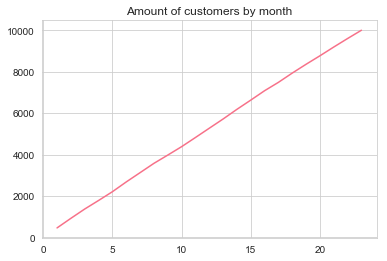

In [9]:
plt.plot(sorted(df.month.unique()), df.groupby("month").agg({"id": "count"}))
plt.title("Amount of customers by month")

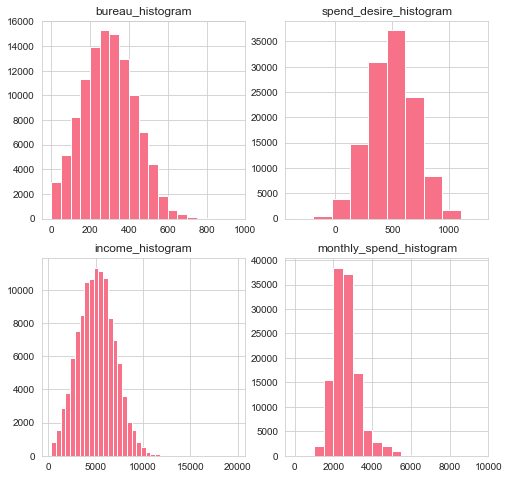

In [10]:
fig, axes = plt.subplots(2, 2, figsize=(8,8))
axes[0, 0].hist(df.bureau_score, range(0, 1000, 50))
axes[1, 0].hist(df.income, range(300, 20000, 500))
axes[0, 1].hist(df.spend_desire)
axes[1, 1].hist(df.monthly_spend, range(0, 10000, 500))

titles = ["bureau_histogram", "income_histogram", "spend_desire_histogram", "monthly_spend_histogram"]
axes[0, 0].set_title(titles[0])
axes[1, 0].set_title(titles[1])
axes[0, 1].set_title(titles[2])
axes[1, 1].set_title(titles[3])
plt.show()

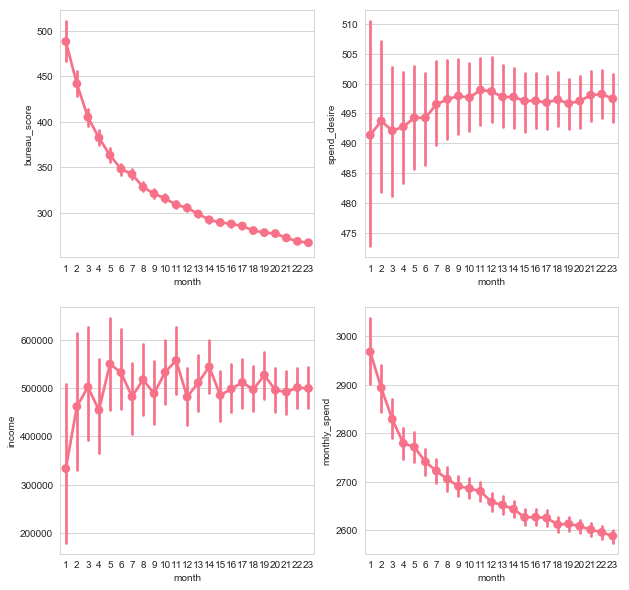

In [11]:
fig, axes = plt.subplots(2, 2, figsize=(10,10))
sns.pointplot(x="month", y="bureau_score", data=df, ax=axes[0, 0])
sns.pointplot(x="month", y="income", data=df, ax=axes[1, 0])
sns.pointplot(x="month", y="spend_desire", data=df, ax=axes[0, 1])
sns.pointplot(x="month", y="monthly_spend", data=df, ax=axes[1, 1])
plt.show()

## Target Analysis

In [12]:
pd.DataFrame(df.groupby("month_date").apply(lambda x: x.target.isna().sum()), columns=["null_count_by_month"])

,null_count_by_month
month_date,
2017-02-01,0
2017-03-04,0
2017-04-04,0
2017-05-05,0
2017-06-05,0
2017-07-06,0
2017-08-06,0
2017-09-06,0
2017-10-07,0


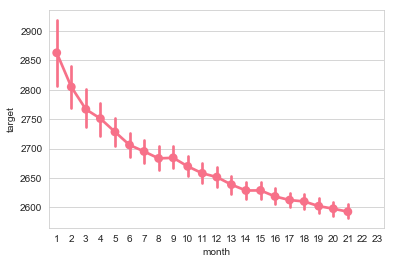

In [13]:
sns.pointplot(x="month", y="target", data=df)

# Getting started with fklearn: Creating a simple model

* <font size="4"> FKlearn is focused on creating production ready models but is flexible to be used at research and learning tasks</font>


* <font size="4"> Tradional steps of training a model like: Train-Test Splitting, Training and Validating are all implemented on fklearn </font>

## Spliting the dataset into train and holdout

* <font size="4"> On real problems we want to validate our model both in the same period and also on a different period to guarantee our model is a good predictor for the future </font>


* <font size="4"> On this case of customers spend we also would like to validate the performance of the model on a different set of customers to check for overfitting in the population </font>
<img src="imgs/Splitting_Data.png">

In [14]:
from fklearn.preprocessing.splitting import space_time_split_dataset

train_set, intime_outspace_hdout, outime_inspace_hdout, outime_outspace_hdout = \
                                        space_time_split_dataset(df,
                                                 train_start_date="2017-02-01",
                                                 train_end_date="2018-07-01",
                                                 holdout_end_date="2018-10-01",
                                                 split_seed=42,
                                                 space_holdout_percentage=0.2,
                                                 space_column="id",
                                                 time_column="month_date")

In [15]:
(train_set.shape, 
 intime_outspace_hdout.shape, 
 outime_inspace_hdout.shape,
 outime_outspace_hdout.shape)

((54206, 12), (13421, 12), (25055, 12), (4488, 12))

## Training:
<font size="4"> *On the training process we want:* </font>

* <font size="4">  **Cap features** that have unexpected values </font>


* <font size="4"> **Encode categorical features** </font>


* <font size="4">  **Fill missing values** </font>


* <font size="4">  **Train our model** </font>


* <font size="4"> We want to apply this **same transformations when scoring our model**, similarly to the fit and transform concept from sklearn </font>



<img src="imgs/Pipeline.png">


<img src="imgs/partial-functions.png">

In [16]:
from fklearn.training.transformation import capper, prediction_ranger, label_categorizer
from fklearn.training.imputation import imputer
from fklearn.training.regression import lgbm_regression_learner
capper_fn = capper(columns_to_cap=["income"], precomputed_caps={"income": 20000.0})
ranger_fn = prediction_ranger(prediction_min=0.0, prediction_max=100000.0, prediction_column="prediction")
label_fn = label_categorizer(columns_to_categorize=["phone_type"])
imputer_fn = imputer(columns_to_impute=["bureau_score"], impute_strategy="median")
regression_fn = lgbm_regression_learner(features=features, target="target", learning_rate=0.1, num_estimators=200)

In [17]:
from fklearn.training.pipeline import build_pipeline
train_fn = build_pipeline(label_fn, capper_fn, imputer_fn, regression_fn, ranger_fn)

In [18]:
predict_fn, scored_train_set, train_logs = train_fn(train_set)

/Users/henriquelopes/miniconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [19]:
scored_train_set.head()

,id,month,income,created_at,phone_type,bureau_score,spend_desire,random_noise,monthly_spend,month_date,avg_last_2_months_spend,target,prediction
9,2,3,2424.105189,2017-03-28,0,611.650913,641.98234,858.263250,3059.915274,2017-04-04,NaN,3492.075105,2886.165513
10,2,4,20000.000000,2017-03-28,0,310.829209,641.98234,984.614824,4447.520879,2017-05-05,3753.718077,2425.698944,2788.816923
11,2,5,2424.105189,2017-03-28,0,310.829209,641.98234,1004.881140,2536.629332,2017-06-05,3492.075105,2256.332465,2783.500567
12,2,6,2424.105189,2017-03-28,0,156.248181,641.98234,960.071795,2314.768557,2017-07-06,2425.698944,3476.051462,2758.309663
13,2,7,2424.105189,2017-03-28,0,167.091261,641.98234,991.301503,2197.896373,2017-08-06,2256.332465,3648.279899,2789.522977


In [20]:
pd.options.display.max_rows = 120
pd.DataFrame(train_logs['lgbm_regression_learner']['feature_importance'], 
             index=["importance"]).T.sort_values("importance", ascending=False)

,importance
avg_last_2_months_spend,1149
spend_desire,1129
bureau_score,987
income,967
monthly_spend,960
random_noise,808


In [21]:
scored_outime_outspace_hdout = predict_fn(outime_outspace_hdout)
scored_intime_outspace_hdout = predict_fn(intime_outspace_hdout)
scored_outime_inspace_hdout = predict_fn(outime_inspace_hdout)

In [22]:
scored_outime_outspace_hdout[["id", "month_date", "income", "bureau_score", "target", "prediction"]].head()

,id,month_date,income,bureau_score,target,prediction
1,0,2018-07-13,5015.685403,522.001029,3228.706602,3451.870684
2,0,2018-08-13,5015.685403,381.931691,3357.249359,3210.763017
3,0,2018-09-13,5015.685403,316.660045,3358.220025,3385.630512
148,13,2018-07-13,20000.000000,330.107289,2107.578901,2398.327320
149,13,2018-08-13,1731.884844,260.790931,2091.307307,2328.283377


## Evaluation:
* <font size="4"> We want to evaluate the performance of our model using multiple metrics for each dataframe (out_of_time, out_of_space, out_of_time_and_space) </font>


<img src="imgs/EvalFn.png">

In [23]:
from fklearn.validation.evaluators import r2_evaluator, spearman_evaluator, combined_evaluators

In [24]:
r2_eval_fn = r2_evaluator(prediction_column="prediction", target_column="target")
spearman_eval_fn = spearman_evaluator(prediction_column="prediction", target_column="target")
eval_fn = combined_evaluators(evaluators=[r2_eval_fn, spearman_eval_fn])

In [25]:
outime_outspace_hdout_logs = eval_fn(scored_outime_outspace_hdout)
intime_outspace_hdout_logs = eval_fn(scored_intime_outspace_hdout)
outime_inspace_hdout_logs = eval_fn(scored_outime_inspace_hdout)

In [26]:
{"out_of_time": outime_outspace_hdout_logs, 
 "in_time": intime_outspace_hdout_logs,
  "out_of_time_and_space": outime_inspace_hdout_logs}

{'out_of_time': {'r2_evaluator__target': 0.5956009555286967,
  'spearman_evaluator__target': 0.7892796752342339},
 'in_time': {'r2_evaluator__target': 0.588576925917941,
  'spearman_evaluator__target': 0.787194941139121},
 'out_of_time_and_space': {'r2_evaluator__target': 0.5749628505861282,
  'spearman_evaluator__target': 0.7790056568693072}}

## Extractors
* <font size="4"> We want to transform this logs into dataframes that we can visualize better </font>

<img src="imgs/Extractor.png" style="width: 500px;">

In [27]:
from fklearn.metrics.pd_extractors import evaluator_extractor, combined_evaluator_extractor, extract
r2_extractor = evaluator_extractor(evaluator_name="r2_evaluator__target")
spearman_extractor = evaluator_extractor(evaluator_name="spearman_evaluator__target")
full_extractor = combined_evaluator_extractor(base_extractors=[r2_extractor, spearman_extractor])

In [28]:
pd.concat(
    [full_extractor(outime_outspace_hdout_logs).assign(part="out_of_time"),
    full_extractor(intime_outspace_hdout_logs).assign(part="in_time_out_of_space"),
    full_extractor(outime_inspace_hdout_logs).assign(part="out_of_time_and_space")])

,r2_evaluator__target,spearman_evaluator__target,part
0,0.595601,0.789280,out_of_time
0,0.588577,0.787195,in_time_out_of_space
0,0.574963,0.779006,out_of_time_and_space


# Learning Curves:

<img src="imgs/LearningCurves.png">

<font size="5"> We can reuse our previously defined training function and evaluators! </font>


## Could we improve if we had more data?? AKA Spatial Learning Curve

* <font size="4"> If we had more data we could use that for training and see how much the model improves </font>


* <font size="4"> To estimate that we can train with subsamples of the full training set and check how performance changes </font>


<img src="imgs/SpatialLearningCurves.png">

<img src="imgs/validation-explanation.png">

In [29]:
from fklearn.validation.splitters import spatial_learning_curve_splitter

split_fn = spatial_learning_curve_splitter(space_column="id", 
                                           time_column="month_date",
                                           training_limit="2018-04-01", 
                                           train_percentages=[0.1, 0.2, 0.4, 0.6, 0.8, 1.0])

In [30]:
from fklearn.validation.validator import parallel_validator

spatial_learning_curve_logs = parallel_validator(train_set, split_fn, train_fn, eval_fn, n_jobs=8)

/Users/henriquelopes/miniconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
/Users/henriquelopes/miniconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
/Users/henriquelopes/miniconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
/Users/henriquelopes/miniconda3/lib/python3.6/site-packages/sklearn/ut

In [31]:
spatial_learning_curve_logs

{'train_log': [{'label_categorizer': {'transformed_column': ['phone_type'],
    'replace_unseen': nan,
    'running_time': '0.022 s'},
   'capper': {'caps': {'income': 20000.0},
    'transformed_column': ['income'],
    'precomputed_caps': {'income': 20000.0},
    'running_time': '0.076 s'},
   'imputer': {'impute_strategy': 'median',
    'columns_to_impute': ['bureau_score'],
    'training_proportion_of_nulls': {'bureau_score': 0.09924550203134068},
    'statistics': array([325.16258753]),
    'running_time': '0.038 s'},
   'lgbm_regression_learner': {'features': ['income',
     'bureau_score',
     'spend_desire',
     'random_noise',
     'monthly_spend',
     'avg_last_2_months_spend'],
    'target': 'target',
    'prediction_column': 'prediction',
    'package': 'lightgbm',
    'package_version': '2.2.3',
    'parameters': {'eta': 0.1,
     'objective': 'regression',
     'num_estimators': 200},
    'feature_importance': {'income': 979,
     'bureau_score': 1008,
     'spend_desir

In [32]:
data = extract(spatial_learning_curve_logs['validator_log'], full_extractor)

In [33]:
data

,r2_evaluator__target,spearman_evaluator__target,fold_num,train_start,train_end,train_size,test_start,test_end,test_size,percentage
0,0.508638,0.738659,0,2017-02-01,2018-03-11,5169,2018-04-11,2018-06-12,16944,0.1
0,0.528637,0.755940,1,2017-02-01,2018-03-11,10095,2018-04-11,2018-06-12,16944,0.2
0,0.552685,0.770868,2,2017-02-01,2018-03-11,19722,2018-04-11,2018-06-12,16944,0.4
0,0.559033,0.774684,3,2017-02-01,2018-03-11,28199,2018-04-11,2018-06-12,16944,0.6
0,0.561065,0.775397,4,2017-02-01,2018-03-11,34971,2018-04-11,2018-06-12,16944,0.8
0,0.562324,0.776055,5,2017-02-01,2018-03-11,37262,2018-04-11,2018-06-12,16944,1.0


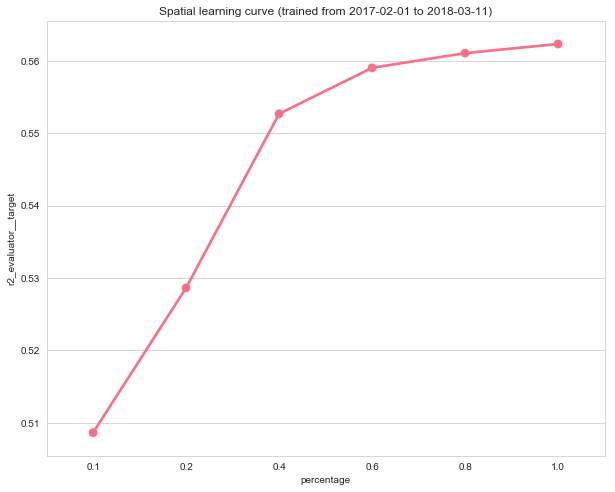

In [34]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.pointplot(data=data, ax=ax, x="percentage", y="r2_evaluator__target")
plt.title("Spatial learning curve (trained from %s to %s)" % (data.train_start.dt.date.min(), data.train_end.dt.date.max()));

## Performance over time

* <font size="4"> That metric can be thought as split your dataset month by month and computing the desired metrics
</font>


* <font size="4"> We can do that with ease using our split evaluators </font>

In [35]:
from fklearn.validation.evaluators import split_evaluator
from fklearn.metrics.pd_extractors import split_evaluator_extractor
out_of_space_holdout = pd.concat([scored_intime_outspace_hdout, scored_outime_outspace_hdout])

monthly_eval_fn = split_evaluator(eval_fn=eval_fn,
                                  split_col="month",
                                  split_values=list(range(0, 25)))

monthly_extractor = split_evaluator_extractor(base_extractor=full_extractor, 
                                              split_col="month", 
                                              split_values=list(range(0, 25)))

In [36]:
out_of_space_logs = monthly_eval_fn(out_of_space_holdout)

In [37]:
monthly_performance = monthly_extractor(out_of_space_logs)

In [38]:
monthly_performance

,r2_evaluator__target,spearman_evaluator__target,split_evaluator__month
0,NaN,NaN,0
0,0.421870,0.744979,1
0,0.491403,0.701534,2
0,0.478469,0.729370,3
0,0.534005,0.736146,4
0,0.538004,0.752896,5
0,0.528558,0.749593,6
0,0.599890,0.799352,7
0,0.603244,0.796775,8
0,0.627977,0.808087,9


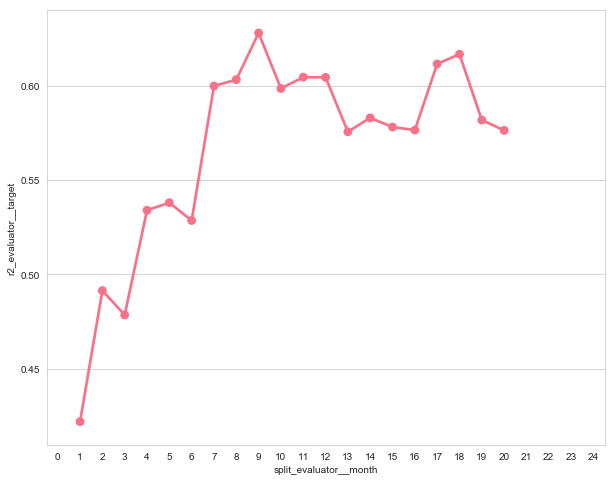

In [39]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.pointplot(data=monthly_performance, ax=ax, x="split_evaluator__month", y="r2_evaluator__target")

##  Impact of More Data on Monthly Performance?

* <font size="4"> We want both our previous way of spliting our dataset and the evaluator we created </font>


* <font size="4"> We can use both to create a new spatial learning curve! </font>

In [40]:
monthly_spatial_learning_curve_logs = parallel_validator(train_set,
                                                         split_fn,
                                                         train_fn,
                                                         monthly_eval_fn,
                                                         n_jobs=8)

In [41]:
monthly_data = extract(monthly_spatial_learning_curve_logs['validator_log'], monthly_extractor).loc[lambda df: df.r2_evaluator__target.notna()]

In [42]:
monthly_data

,r2_evaluator__target,spearman_evaluator__target,split_evaluator__month,fold_num,train_start,train_end,train_size,test_start,test_end,test_size,percentage
0,0.540541,0.758164,15,0,2017-02-01,2018-03-11,5094,2018-04-11,2018-06-12,16711,0.1
0,0.514314,0.743269,16,0,2017-02-01,2018-03-11,5094,2018-04-11,2018-06-12,16711,0.1
0,0.507848,0.743218,17,0,2017-02-01,2018-03-11,5094,2018-04-11,2018-06-12,16711,0.1
0,0.566848,0.774746,15,1,2017-02-01,2018-03-11,9987,2018-04-11,2018-06-12,16711,0.2
0,0.543697,0.761993,16,1,2017-02-01,2018-03-11,9987,2018-04-11,2018-06-12,16711,0.2
0,0.539739,0.762033,17,1,2017-02-01,2018-03-11,9987,2018-04-11,2018-06-12,16711,0.2
0,0.586378,0.786420,15,2,2017-02-01,2018-03-11,19440,2018-04-11,2018-06-12,16711,0.4
0,0.565958,0.775002,16,2,2017-02-01,2018-03-11,19440,2018-04-11,2018-06-12,16711,0.4
0,0.562612,0.773501,17,2,2017-02-01,2018-03-11,19440,2018-04-11,2018-06-12,16711,0.4
0,0.593950,0.789789,15,3,2017-02-01,2018-03-11,28068,2018-04-11,2018-06-12,16711,0.6


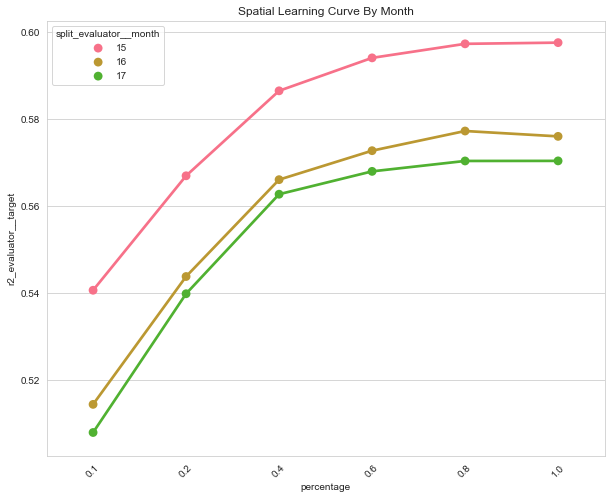

In [43]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.pointplot(data=monthly_data, ax=ax, x="percentage", y="r2_evaluator__target", hue="split_evaluator__month")
plt.title("Spatial Learning Curve By Month")
plt.xticks(rotation=45);

# What else does fklearn provide me?

* <font size="4"> Several other **learning curves** that can be used depending on what you want to evaluate </font>


* <font size="4"> Several other **algorithms** for models </font>


* <font size="4"> Other tools with similar interface for **feature selection, parameter tuning** </font>


* <font size="4"> All this methods are integrated with similar signatures in a way that is easy to reuse training, spliting and evaluation functions </font>



# Learn more:

<font size="4"> 
1. Medium blog post: https://medium.com/building-nubank/   
    
2. Documentation: https://fklearn.readthedocs.io/ </font>
